# Decision Tree ECAP

A decision tree is a supervised machine learning algorithm that uses a tree-like structure to achieve an outcome. These are the different parts that make up the decision tree.

**The Root Node:** This is the starting point of the tree, containing and representing the entire data.

**The Decision Node:** A decision node contains the question about the feature to decide its splitting.

**Branches:** They represent the possible outcome of the question. (ex.) True/False, Yes/No

**Leaf Node:** The final node at the end of the branches, containing the final prediction or the classification.

Decision tree works recursively by splitting the data accordingly to the series of question that is being asked until a final decision or a leaf node is produced containing prediction. The following is a code that utilizes decision tree in order to formulate a prediction.

# Phase 1: Data Retrieval

In [7]:
import pandas as pd
import numpy as np

Data_Frame = pd.read_csv('C:/Users/hik/Downloads/japanese_warrior_dataset.csv')

In [8]:
display(Data_Frame)

,name,clan_affiliation,class,kenjutsu,kyujutsu,stealth,strength,endurance,leadership,loyalty,...,income,armor,weapon,role,battle_exp,missions,covert,discipline,aggression,honour
0,Kiyomi Oda,Oda,Ashigaru,5,4,3,8,5,NaN,4,...,60,Medium,Katana,Frontline,11,6,0,6,9,6
1,Yorimitsu Fujimoto,Fujimoto,Ashigaru,6,8,3,10,7,NaN,6,...,123,Medium,Katana,Frontline,1,24,0,7,5,5
2,Haruto Mori,Mori,Samurai,7,8,3,9,8,NaN,9,...,382,Medium,Katana,Frontline,19,32,1,9,3,9
3,Ryuunosuke Fujimoto,Fujimoto,Samurai,7,8,4,6,6,NaN,8,...,521,Heavy,Bow,Frontline,17,35,0,7,6,10
4,Ren Hojo,Hojo,Samurai,9,8,2,9,7,Squad,7,...,497,Heavy,Bow,Frontline,14,21,0,8,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Miyu Shimazu,Shimazu,Samurai,8,6,2,7,6,Squad,10,...,551,Heavy,Spear,Frontline,14,14,2,7,6,9
96,Keiji Fujimoto,Fujimoto,Ashigaru,3,5,3,9,5,NaN,8,...,105,Medium,Katana,Frontline,5,7,0,4,9,2
97,Makoto Oda,Oda,Samurai,10,7,3,9,9,NaN,7,...,578,Heavy,Spear,Frontline,17,28,2,7,6,9
98,Akio Date,Date,Ashigaru,3,6,3,7,6,NaN,5,...,86,Medium,Katana,Frontline,6,22,0,6,6,3


# Phase 2: Data Understanding

Here the different features concerning our Japanese warriors dataset is being displayed. We have a count of 22 features.

In [11]:
Data_Frame.columns

Index(['name', 'clan_affiliation', 'class', 'kenjutsu', 'kyujutsu', 'stealth',
       'strength', 'endurance', 'leadership', 'loyalty', 'strategy',
       'class_level', 'income', 'armor', 'weapon', 'role', 'battle_exp',
       'missions', 'covert', 'discipline', 'aggression', 'honour'],
      dtype='object')

In [12]:
display(Data_Frame.dtypes) #Displays which of our variables are strings and which of them are integers

name                object
clan_affiliation    object
class               object
kenjutsu             int64
kyujutsu             int64
stealth              int64
strength             int64
endurance            int64
leadership          object
loyalty              int64
strategy             int64
class_level         object
income               int64
armor               object
weapon              object
role                object
battle_exp           int64
missions             int64
covert               int64
discipline           int64
aggression           int64
honour               int64
dtype: object

In [13]:
display(Data_Frame.describe())

,kenjutsu,kyujutsu,stealth,strength,endurance,loyalty,strategy,income,battle_exp,missions,covert,discipline,aggression,honour
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,6.810000,6.050000,3.160000,7.050000,6.940000,7.170000,5.950000,418.840000,11.830000,24.390000,2.91000,7.250000,5.480000,6.140000
std,1.988325,1.472818,2.576977,1.876893,1.153125,1.995222,2.031942,418.746753,5.603129,11.393685,6.25081,1.903612,1.731934,3.045182
min,3.000000,2.000000,0.000000,3.000000,5.000000,3.000000,2.000000,50.000000,1.000000,6.000000,0.00000,3.000000,2.000000,1.000000
25%,5.000000,5.000000,1.000000,6.000000,6.000000,6.000000,5.000000,122.500000,7.000000,15.000000,0.00000,6.000000,4.000000,3.000000
50%,7.000000,6.000000,2.000000,7.000000,7.000000,7.000000,6.000000,380.500000,12.000000,24.500000,0.00000,7.000000,6.000000,7.000000
75%,8.000000,7.000000,3.000000,9.000000,8.000000,8.250000,8.000000,560.000000,17.000000,31.000000,2.00000,9.000000,6.250000,9.000000
max,10.000000,8.000000,10.000000,10.000000,9.000000,10.000000,9.000000,2660.000000,25.000000,59.000000,30.00000,10.000000,9.000000,10.000000


Here we are getting a count of how much warriors are in each class. In this case, there are a total of 45 samurai warriors in our dataset, while there are
3 daimyo or warlords in our dataset.

We are receiving how many values are not a null values. Many of our warriors are not leaders, there is a total of 32 leaders in our dataset, meaning they have a value within them while the rest 68 leaders have null values

In [16]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              100 non-null    object
 1   clan_affiliation  100 non-null    object
 2   class             100 non-null    object
 3   kenjutsu          100 non-null    int64 
 4   kyujutsu          100 non-null    int64 
 5   stealth           100 non-null    int64 
 6   strength          100 non-null    int64 
 7   endurance         100 non-null    int64 
 8   leadership        32 non-null     object
 9   loyalty           100 non-null    int64 
 10  strategy          100 non-null    int64 
 11  class_level       100 non-null    object
 12  income            100 non-null    int64 
 13  armor             100 non-null    object
 14  weapon            100 non-null    object
 15  role              100 non-null    object
 16  battle_exp        100 non-null    int64 
 17  missions         

In [17]:
import matplotlib.pyplot as plt

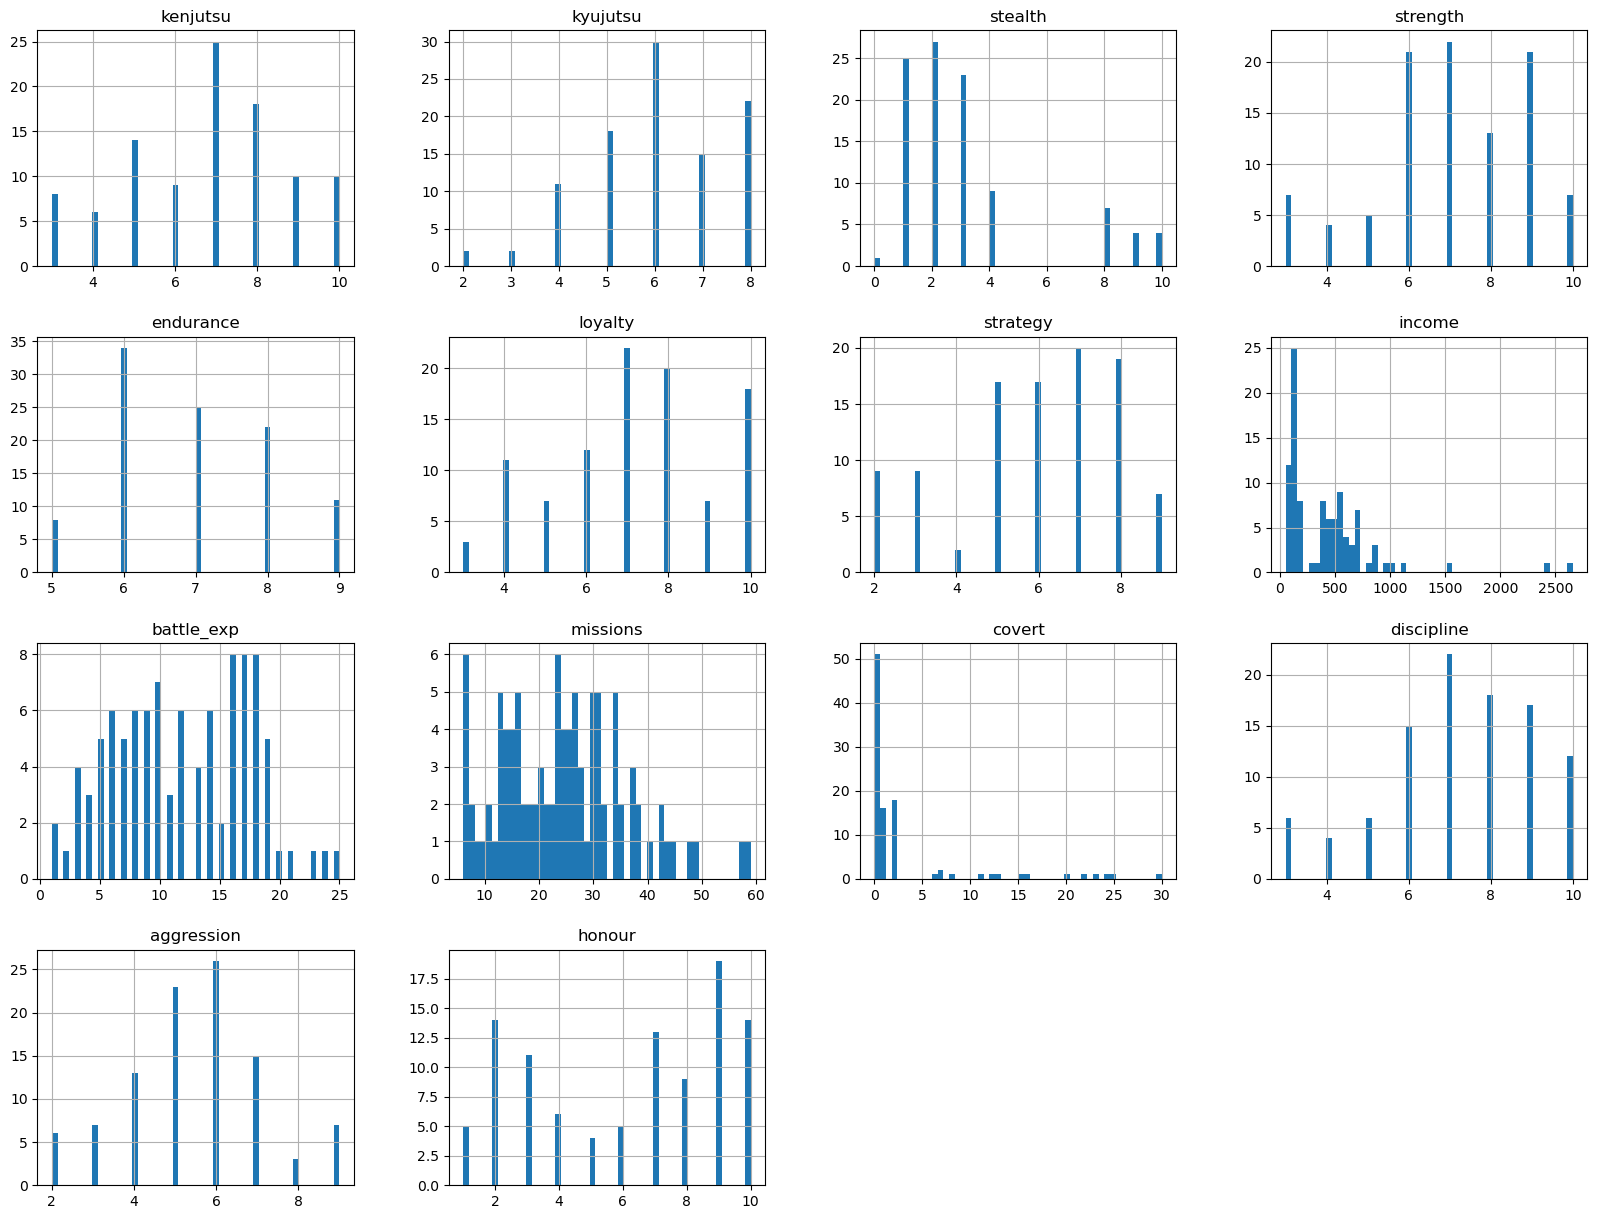

In [18]:
Data_Frame.hist(bins = 50, figsize = (20, 15))
plt.show()

**How much percentage do each class make concerning the army as whole?**

In [20]:
Data_Frame['class'].value_counts()

class
Samurai     45
Ashigaru    30
Shinobi     15
Hatamoto     7
Daimyo       3
Name: count, dtype: int64

In [21]:
def class_percentage(df):
    counts = df['class'].value_counts()
    sum_of_class = len(df)

    for cls, count in counts.items():
        calculation = (count / sum_of_class) * 100
        print(f"{cls} makes up {int(calculation)} % of the army")

class_percentage(Data_Frame)

Samurai makes up 45 % of the army
Ashigaru makes up 30 % of the army
Shinobi makes up 15 % of the army
Hatamoto makes up 7 % of the army
Daimyo makes up 3 % of the army


**A bargraph that gives us a visualization concerning these classes in our dataset**

In [48]:
classes_column = Data_Frame['class'].value_counts()
print(classes_column)

classes_names = Data_Frame['class'].unique()
classes_names.tolist()

class
Samurai     45
Ashigaru    30
Shinobi     15
Hatamoto     7
Daimyo       3
Name: count, dtype: int64


['Ashigaru', 'Samurai', 'Shinobi', 'Hatamoto', 'Daimyo']

In [112]:
class_occurences = Data_Frame['class'].value_counts().values
class_occurences = class_occurences.tolist()

class_occurences_list = []
class_occurences_list.append(class_occurences)
class_occurences_list = class_occurences_list[0]

print(class_occurences_list)
print(classes_names)

[45, 30, 15, 7, 3]
['Ashigaru' 'Samurai' 'Shinobi' 'Hatamoto' 'Daimyo']
